https://medium.com/@fsflyingsoar/%E7%AD%86%E8%A8%98-for-python-jieba-wordcloud-b814f5e04e01

In [2]:
!pip install wordcloud

In [3]:
!pip install flask==0.12.2
!pip install flask_ngrok
!pip install wordcloud
!pip install jieba

import os
import re
import pickle
import time
import jieba
import jieba.analyse
import jieba.posseg as pseg
import imageio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from flask import Flask, request, render_template, redirect
from flask_ngrok import run_with_ngrok


In [4]:
data_path = "./data_final4.csv"
data_final2 = pd.read_csv(data_path, engine='python')
# data_final2.head()

In [5]:
file_path = './jieba/dict2.txt'
jieba.set_dictionary(file_path)

In [6]:
file_name = './jieba/stop_words2.txt'
jieba.analyse.set_stop_words(file_name)

In [7]:
def remove_stop_words(file_name,seg_list):
    with open(file_name,'r') as f:
        stop_words = f.readlines()
        
    stop_words = [stop_word.rstrip() for stop_word in stop_words]
    stop_words += ['\n'] # rstrip會剔除掉，所以補一個回去
    new_list = []
  
    for seg in seg_list:
        if seg not in stop_words:
            new_list.append(seg) #若在for loop裡用remove的話則會改變總長度
    return new_list

In [19]:
# Text = '不可錯過的本月精選人氣排行榜!\n \n從絕景寄明信片到您手中吧\n \n東京推薦的飯店‧旅.'

In [7]:
data_label0 = data_final2[data_final2['cat_0']==1]

In [8]:
data0 = data_label0['tw_text'].tolist()

In [9]:
stop_words = open('./jieba/stop_words2.txt').read().splitlines()
sentences = []

for i, text in enumerate(data0):

    
    line = []
#     if(i==164):
#         print(text)
    text = str(text)
    for w in jieba.cut(text, cut_all=False):
        
        # remove stopwords and digits
        # can define your own rules
        if w not in stop_words and not bool(re.match('[0-9\n●「」\r\n -/`【】]+', w)):
            line.append(w)

    sentences.append(line)

    if i%1000==0:
        print(i, '/', len(data0))

Building prefix dict from /project/at091-project-group24/ywchen/jieba/dict2.txt ...
Dumping model to file cache /tmp/jieba.u0560dd762a8ea8aec47124d917f91832.cache
Loading model cost 0.953 seconds.
Prefix dict has been built succesfully.


0 / 4721
1000 / 4721
2000 / 4721
3000 / 4721
4000 / 4721


In [22]:
WordinLbl0 = [ item for elem in sentences for item in elem]

In [23]:

#print(sentences[0].value_counts())
labels = pd.Series(WordinLbl0)
labels.value_counts()

比特幣       28160
貨幣        27871
區塊        26927
鏈         23205
加密        17782
          ...  
遴選出           1
勳是            1
comedy        1
許也            1
通信網           1
Length: 80003, dtype: int64

In [44]:
with open("./Data/label0", "wb") as file:
    pickle.dump(sentences, file)

In [ ]:
#針對tw_context進行串接

In [24]:
seg_list=' '.join(WordinLbl0)

In [38]:
font_path = './jieba/TaipeiSansTCBeta-Bold.ttf' # 標楷體

In [ ]:
seg_list=' '.join(WordinLbl0)

In [44]:
def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='black',
                max_words=200,
                font_path='./jieba/TaipeiSansTCBeta-Bold.ttf',
                stopwords=None,
                min_font_size = 10).generate(text) 
             
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

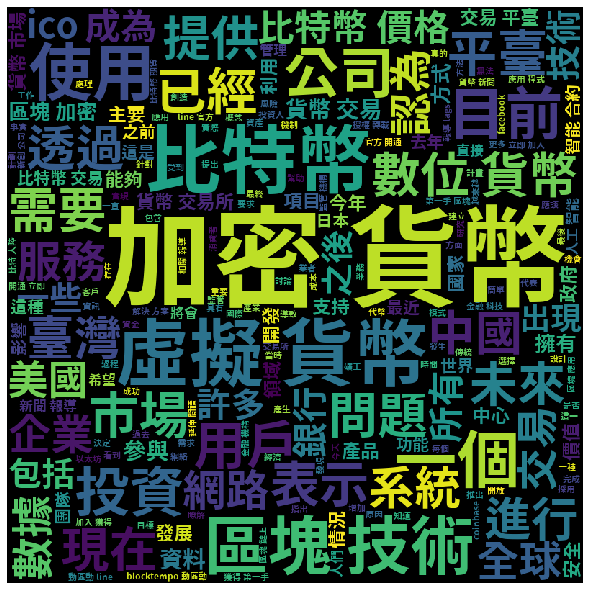

In [49]:
wcplot = plot_word_cloud(seg_list)

In [52]:
fig_path = './WordCloud/label0.png'
wc.to_file(fig_path)

In [ ]:
# function 

In [8]:
stop_path = './jieba/stop_words2.txt'

In [14]:
def process_sentence(data, col_name):
    data_label = data[data[col_name]==1]
    data_list = data_label['tw_text'].tolist()
    stop_words = open(stop_path).read().splitlines()
    sentences = []
    for i, text in enumerate(data_list):
        line = []
        text = str(text)
        for w in jieba.cut(text, cut_all = False):
            if w not in stop_words and not bool (re.match('[0-9\n●「」\r\n -/`【】]+', w)):
                line.append(w)
        sentences.append(line)
        if i % 1000 == 0:
            print(i, '/', len(data_list))
    WordinLbl = [item for elem in sentences for item in elem]
    seg_list = ' '.join(WordinLbl)
    return seg_list

In [15]:
font_path = './jieba/TaipeiSansTCBeta-Bold.ttf' #台北黑體

In [58]:
def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='white',
                max_words=200,
                font_path='./jieba/TaipeiSansTCBeta-Bold.ttf',
                stopwords=None,
                min_font_size = 10).generate(text) 
             
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

0 / 4721
1000 / 4721
2000 / 4721
3000 / 4721
4000 / 4721


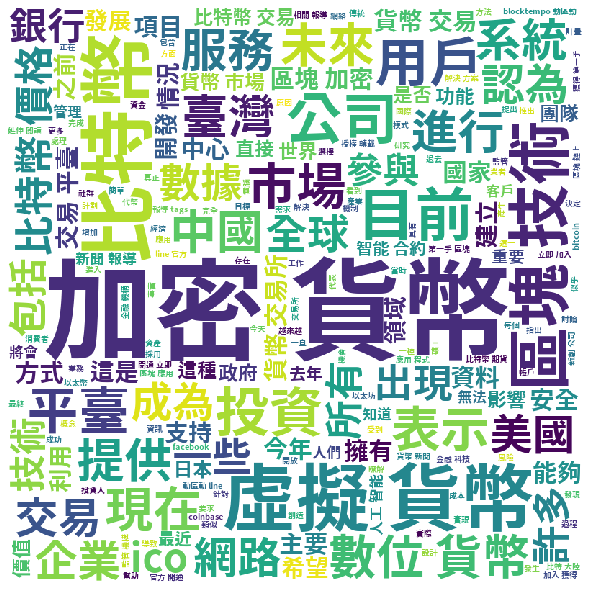

In [59]:
label0 = process_sentence(data_final2, 'cat_0')
plot_word_cloud(label0)

0 / 9995
1000 / 9995
2000 / 9995
3000 / 9995
4000 / 9995
5000 / 9995
6000 / 9995
7000 / 9995
8000 / 9995
9000 / 9995


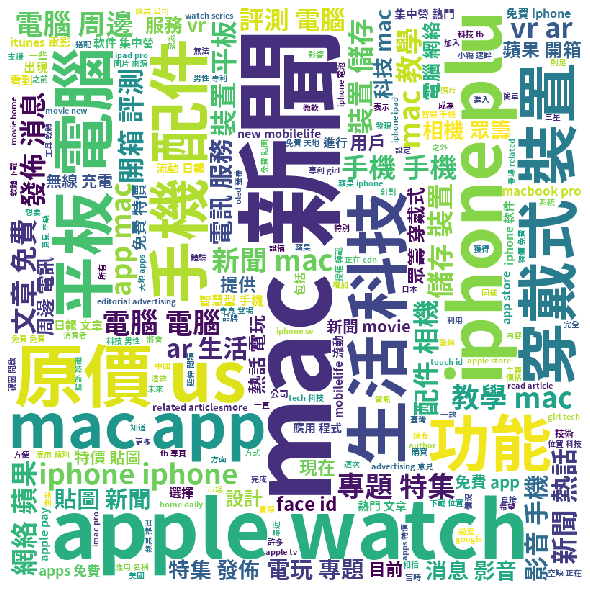

In [60]:
label1 = process_sentence(data_final2, 'cat_1')
plot_word_cloud(label1)

0 / 10003
1000 / 10003
2000 / 10003
3000 / 10003
4000 / 10003
5000 / 10003
6000 / 10003
7000 / 10003
8000 / 10003
9000 / 10003
10000 / 10003


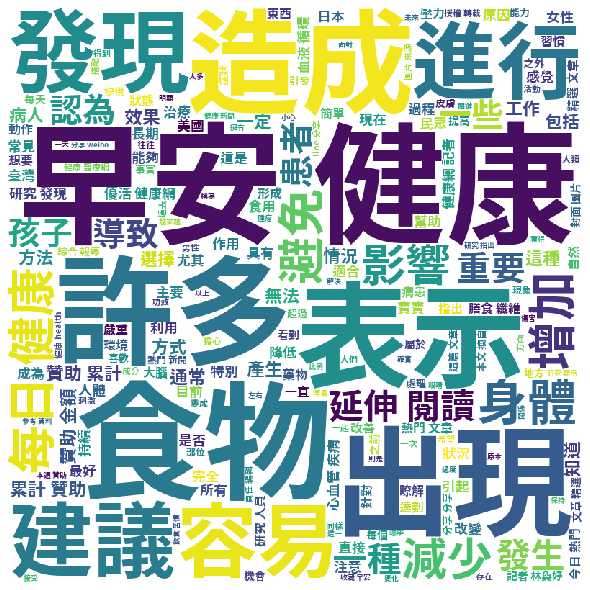

In [61]:
label2 = process_sentence(data_final2, 'cat_2')
plot_word_cloud(label2)

0 / 5259
1000 / 5259
2000 / 5259
3000 / 5259
4000 / 5259
5000 / 5259


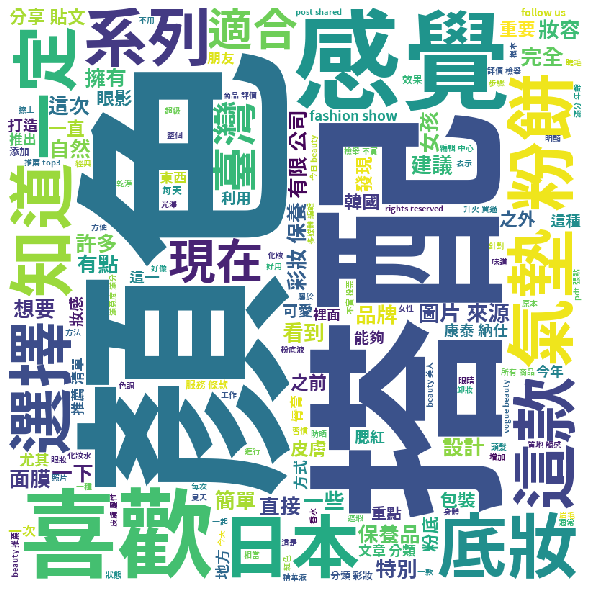

In [62]:
label3 = process_sentence(data_final2, 'cat_3')
plot_word_cloud(label3)

0 / 10004
1000 / 10004
2000 / 10004
3000 / 10004
4000 / 10004
5000 / 10004
6000 / 10004
7000 / 10004
8000 / 10004
9000 / 10004
10000 / 10004


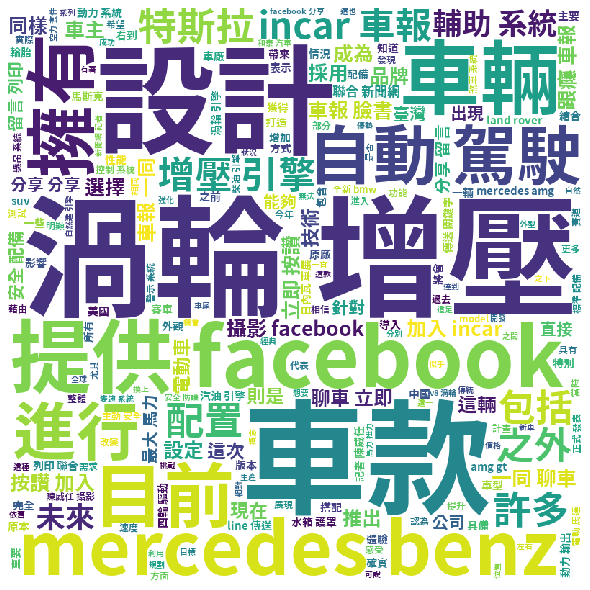

In [63]:
label4 = process_sentence(data_final2, 'cat_4')
plot_word_cloud(label4)

0 / 9994
1000 / 9994
2000 / 9994
3000 / 9994
4000 / 9994
5000 / 9994
6000 / 9994
7000 / 9994
8000 / 9994
9000 / 9994


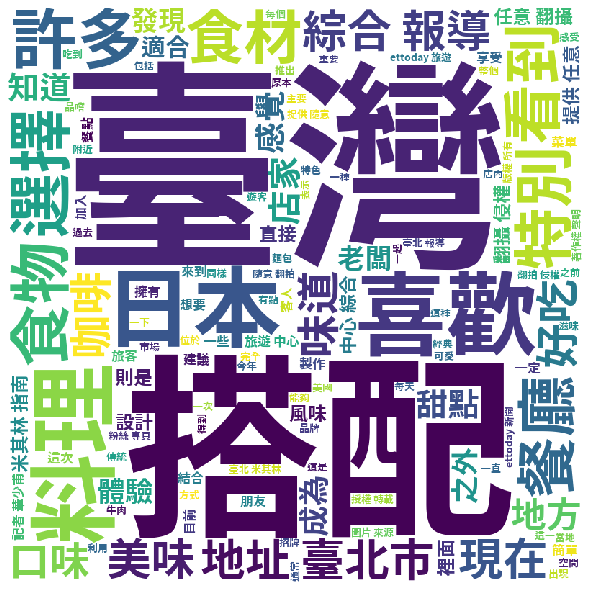

In [64]:
label5 = process_sentence(data_final2, 'cat_5')
plot_word_cloud(label5)

0 / 7462
1000 / 7462
2000 / 7462
3000 / 7462
4000 / 7462
5000 / 7462
6000 / 7462
7000 / 7462


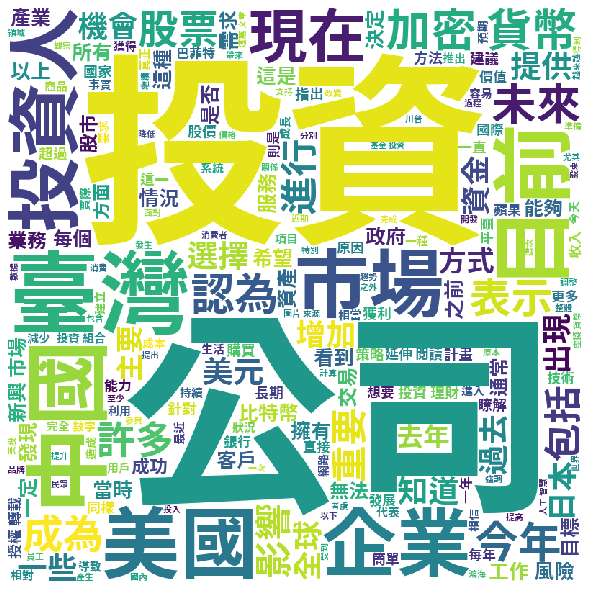

In [65]:
label6 = process_sentence(data_final2, 'cat_6')
plot_word_cloud(label6)

0 / 3951
1000 / 3951
2000 / 3951
3000 / 3951


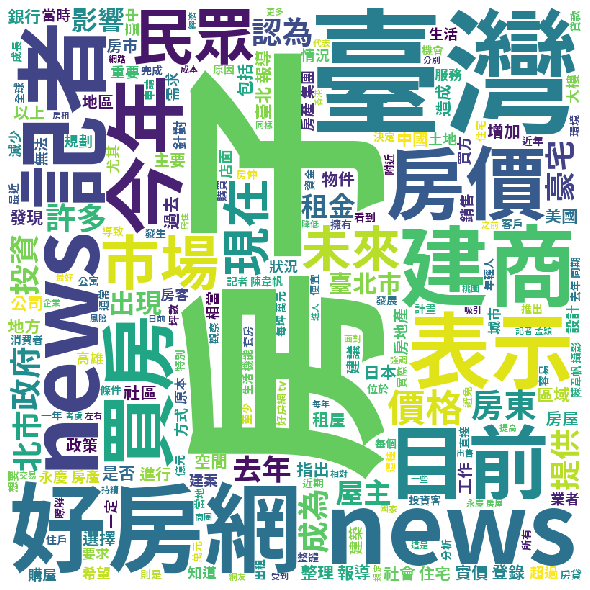

In [66]:
label7 = process_sentence(data_final2, 'cat_7')
plot_word_cloud(label7)

0 / 10002
1000 / 10002
2000 / 10002
3000 / 10002
4000 / 10002
5000 / 10002
6000 / 10002
7000 / 10002
8000 / 10002
9000 / 10002
10000 / 10002


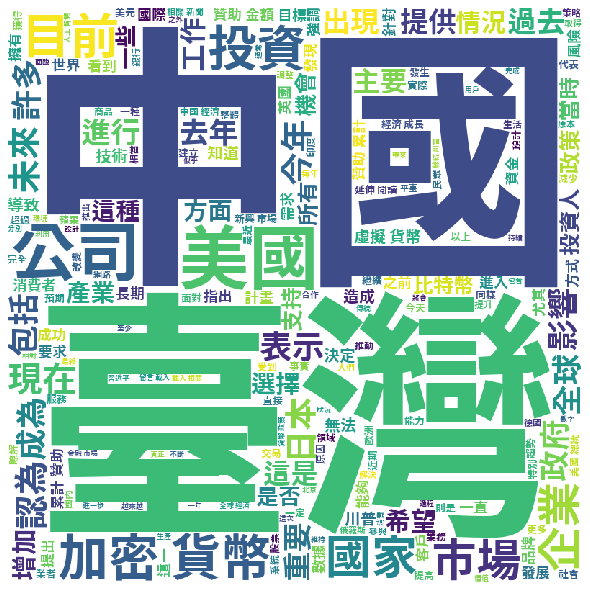

In [67]:
label8 = process_sentence(data_final2, 'cat_8')
plot_word_cloud(label8)

0 / 10019
1000 / 10019
2000 / 10019
3000 / 10019
4000 / 10019
5000 / 10019
6000 / 10019
7000 / 10019
8000 / 10019
9000 / 10019
10000 / 10019


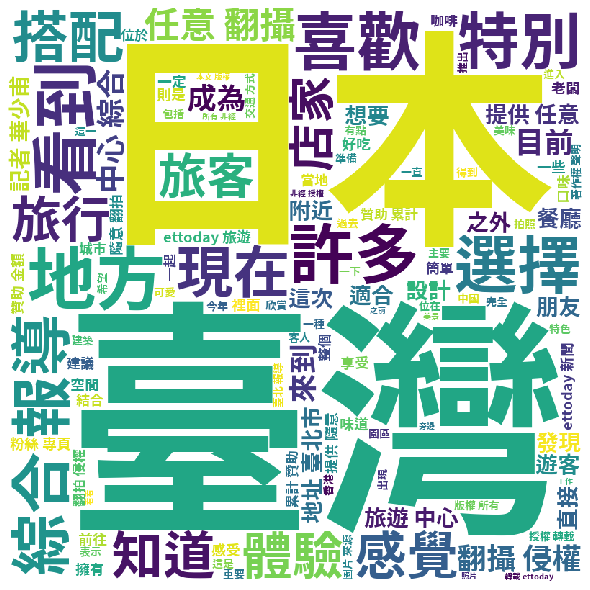

In [68]:
label9 = process_sentence(data_final2, 'cat_9')
plot_word_cloud(label9)

0 / 6445
1000 / 6445
2000 / 6445
3000 / 6445
4000 / 6445
5000 / 6445
6000 / 6445


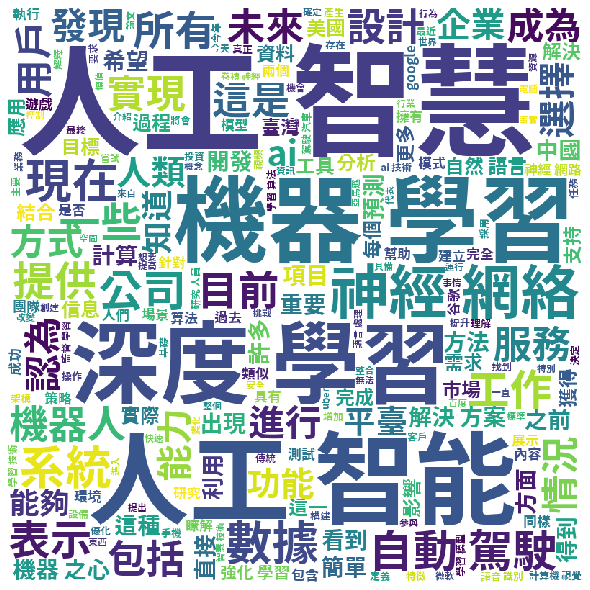

In [69]:
label10 = process_sentence(data_final2, 'cat_10')
plot_word_cloud(label10)

0 / 9957
1000 / 9957
2000 / 9957
3000 / 9957
4000 / 9957
5000 / 9957
6000 / 9957
7000 / 9957
8000 / 9957
9000 / 9957


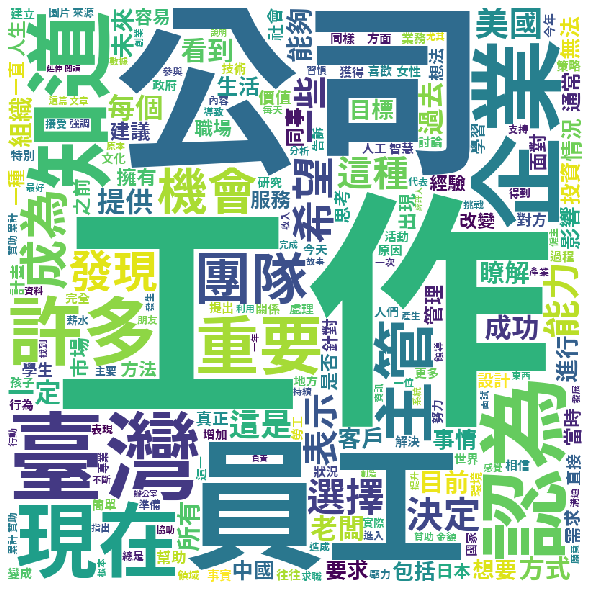

In [70]:
label11 = process_sentence(data_final2, 'cat_11')
plot_word_cloud(label11)

0 / 2622
1000 / 2622
2000 / 2622


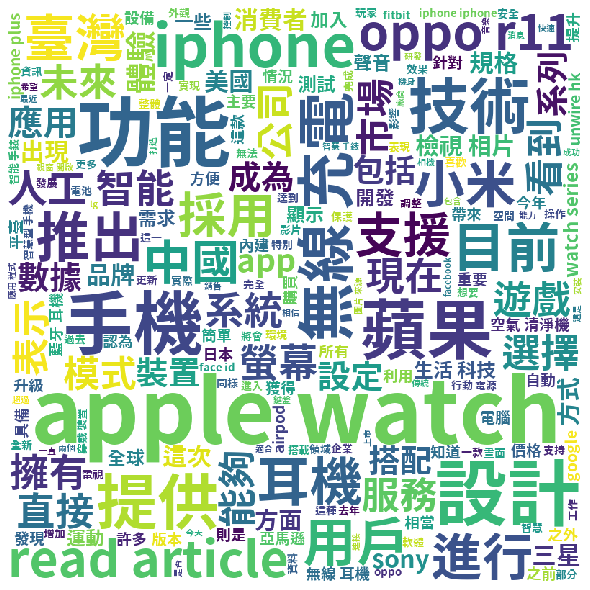

In [71]:
label12 = process_sentence(data_final2, 'cat_12')
plot_word_cloud(label12)

0 / 1993
1000 / 1993


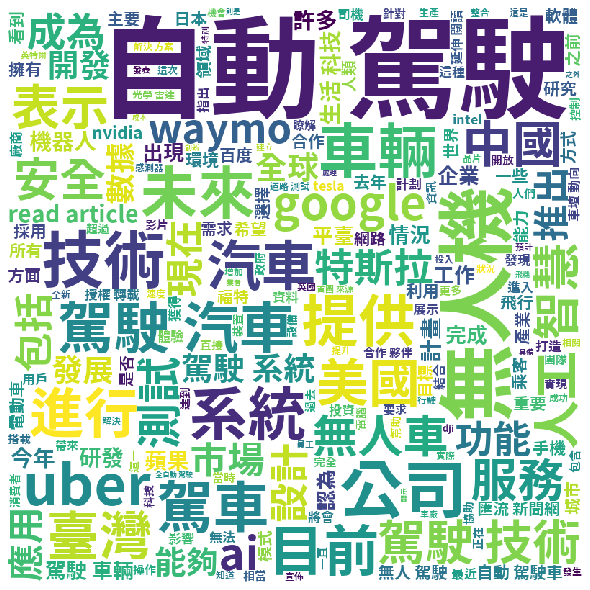

In [72]:
label13 = process_sentence(data_final2, 'cat_13')
plot_word_cloud(label13)